In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data = pd.read_csv('current_results.csv')

# Get average service rates

In [3]:
average_primary_service_time = data['ambulance_service_time'].mean() * 24
average_secondary_service_time = data[data['rrv_service_time'] > 0]['rrv_service_time'].mean() * 24

In [4]:
with open('average_primary_service_time.csv', 'w') as f:
    f.write(str(average_primary_service_time))
with open('average_secondary_service_time.csv', 'w') as f:
    f.write(str(average_secondary_service_time))

# Does job times (service rate) vary by vehicle location?

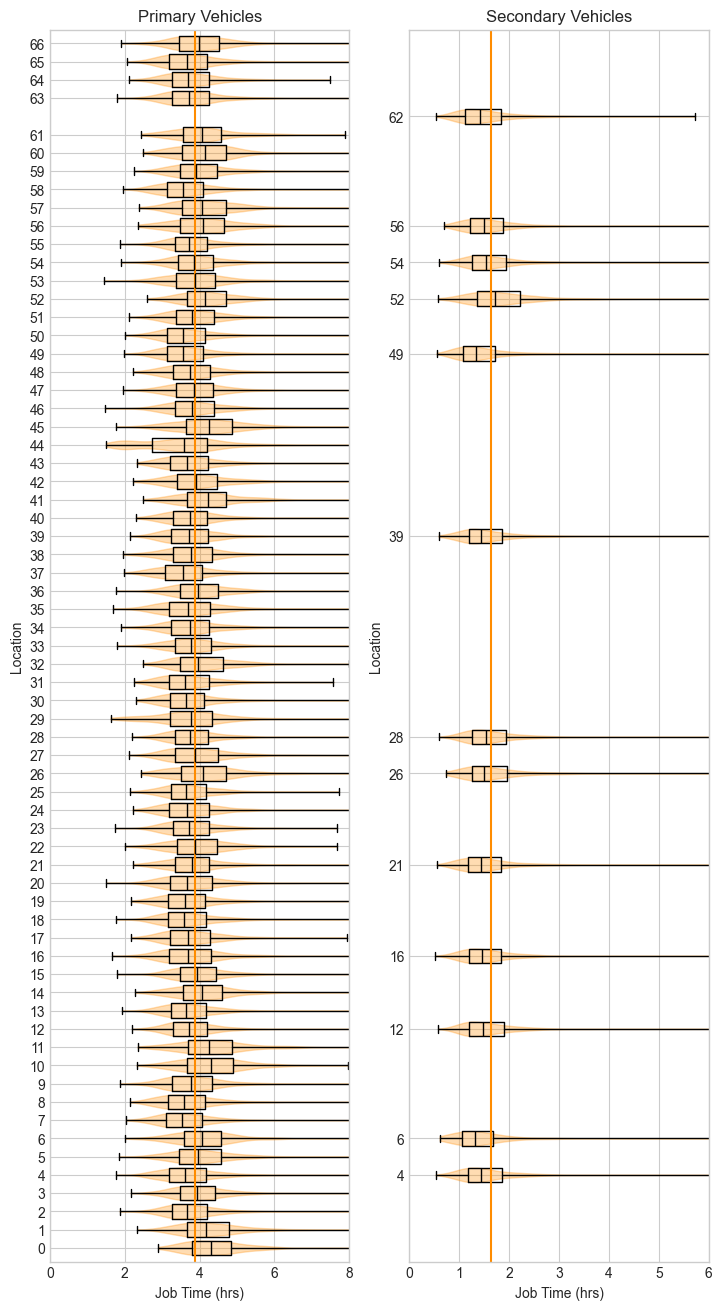

In [5]:
fig, axarr = plt.subplots(1, 2, figsize=(8.5, 16))
for location in range(67):
    if len(data[data['ambulance_location']==location]) > 0:
        viols_primary = axarr[0].violinplot(
            data[data['ambulance_location']==location]['ambulance_service_time'] * 24,
            positions=[location],
            widths=[0.8],
            showmeans=False,
            showmedians=False,
            showextrema=False,
            vert=False
        )
        box_primary = axarr[0].boxplot(
            data[data['ambulance_location']==location]['ambulance_service_time'] * 24,
            positions=[location],
            whis=[0, 100],
            widths=[0.8],
            vert=False
        )
        for pc in viols_primary['bodies']:
            pc.set_facecolor('darkorange')
            pc.set_edgecolor('darkorange')
        for median in box_primary['medians']:
            median.set_color('black')
    if len(data[data['rrv_location']==location]) > 0:
        viols_secondary = axarr[1].violinplot(
            data[(data['rrv_location']==location) & ~data['rrv_service_time'].isna() & data['rrv_service_time'] > 0]['rrv_service_time'] * 24,
            positions=[location],
            widths=[0.8],
            showmeans=False,
            showmedians=False,
            showextrema=False,
            vert=False
        )
        box_secondary = axarr[1].boxplot(
            data[(data['rrv_location']==location) & ~data['rrv_service_time'].isna() & data['rrv_service_time'] > 0]['rrv_service_time'] * 24,
            positions=[location],
            whis=[0, 100],
            widths=[0.8],
            vert=False
        )
        for pc in viols_secondary['bodies']:
            pc.set_facecolor('darkorange')
            pc.set_edgecolor('darkorange')
        for median in box_secondary['medians']:
            median.set_color('black')
axarr[0].vlines(x=data['ambulance_service_time'].mean() * 24, ymin=-1, ymax=67, color='darkorange')
axarr[1].vlines(x=data[data['rrv_service_time'] > 0]['rrv_service_time'].mean() * 24, ymin=-1, ymax=67, color='darkorange')
axarr[0].set_xlim(0, 8)
axarr[0].set_ylim(-0.75, 66.75)
axarr[0].set_ylabel("Location")
axarr[0].set_xlabel("Job Time (hrs)")
axarr[0].set_title("Primary Vehicles")
axarr[1].set_xlim(0, 6)
axarr[1].set_ylim(-0.75, 66.75)
axarr[1].set_ylabel("Location")
axarr[1].set_xlabel("Job Time (hrs)")
axarr[1].set_title("Secondary Vehicles")
plt.show()

In [6]:
print(
    f"Min: {round(data.groupby('ambulance_location')['ambulance_service_time'].mean().min() * 24, 3)}",
    f"Mean: {round(average_primary_service_time, 3)}",
    f"Max: {round(data.groupby('ambulance_location')['ambulance_service_time'].mean().max() * 24, 3)}",
)

Min: 3.543 Mean: 3.886 Max: 4.426


In [7]:
print(
    f"Min: {round(data[data['rrv_service_time'] > 0].groupby('rrv_location')['rrv_service_time'].mean().min() * 24, 3)}",
    f"Mean: {round(average_secondary_service_time, 3)}",
    f"Max: {round(data[data['rrv_service_time'] > 0].groupby('rrv_location')['rrv_service_time'].mean().max() * 24, 3)}",
)

Min: 1.489 Mean: 1.635 Max: 1.876


# What proportion of job time is location dependant?
 + time from the vehicle location to pickup location
 + time to return to the vehicle location

In [8]:
data['proportion_ambulance_job_time_location_dependent'] = (data['ambulance_pick_up_time'] + data['ambulance_return_to_loc_time']) / data['ambulance_service_time']
data['proportion_rrv_job_time_location_dependent'] = (data['rrv_pick_up_time'] + data['rrv_return_to_loc_time']) / data['rrv_service_time']

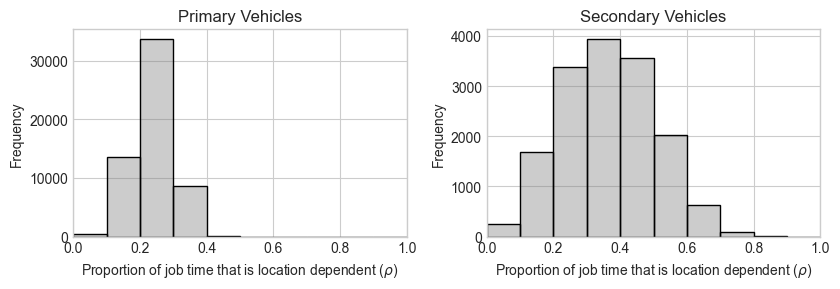

In [10]:
fig, axarr = plt.subplots(1, 2, figsize=(8.5, 3))
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
axarr[0].hist(data['proportion_ambulance_job_time_location_dependent'], facecolor='grey', edgecolor='None', alpha=0.4, bins=bins)
axarr[0].hist(data['proportion_ambulance_job_time_location_dependent'], facecolor='None', edgecolor='black', bins=bins)
axarr[1].hist(data['proportion_rrv_job_time_location_dependent'], facecolor='grey', edgecolor='None', alpha=0.4, bins=bins)
axarr[1].hist(data['proportion_rrv_job_time_location_dependent'], facecolor='None', edgecolor='black', bins=bins)
axarr[0].set_xlim(0, 1)
axarr[1].set_xlim(0, 1)
axarr[0].set_ylabel('Frequency')
axarr[1].set_ylabel('Frequency')
axarr[0].set_xlabel(r"Proportion of job time that is location dependent ($\rho$)")
axarr[1].set_xlabel(r"Proportion of job time that is location dependent ($\rho$)")
axarr[0].set_title("Primary Vehicles")
axarr[1].set_title("Secondary Vehicles")
plt.tight_layout()
fig.savefig("../../tex/img/location_dependant_service_time_proportion.pdf")

In [11]:
print(f"Mean proportion for primary vehicles: {round(data['proportion_ambulance_job_time_location_dependent'].mean(), 4)}")
print(f"Mean proportion for secondary vehicles: {round(data['proportion_rrv_job_time_location_dependent'].mean(), 4)}")

Mean proportion for primary vehicles: 0.2403
Mean proportion for secondary vehicles: 0.3651
